In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [62]:
glass_df = pd.read_csv(r'D:\workspace\MachineLearning\Cases\Glass Identification\Glass.csv', index_col=0)
X = glass_df.drop('Type', axis=1)


In [63]:
eps = np.linspace(0.01,1.5,10)
min_pts = [2,3,4,5]
list=[]
cnt =0 
for i in eps:
    for j in min_pts:
        clust_DB = DBSCAN(eps=i, min_samples=j)
        clust_DB.fit(X.iloc[:,:9])
        if (len(set(clust_DB.labels_))) >= 3:
            cnt += 1
            X['Clust'] = clust_DB.labels_
            df_scl_inliers = X[X['Clust']!=-1]
            list.append([i,j,silhouette_score(df_scl_inliers.iloc[:,:-1], df_scl_inliers.iloc[:,-1])])

scores_df = pd.DataFrame(list, columns=['eps','min_pts','silhouette_score'])
scores_df.sort_values('silhouette_score', ascending=False).head()

,eps,min_pts,silhouette_score
1,0.175556,3,0.703757
33,1.500000,5,0.675574
32,1.500000,4,0.675574
31,1.500000,3,0.638629
0,0.175556,2,0.590559


In [65]:
best_db = DBSCAN(eps=0.175556, min_samples=3)
best_db.fit(X)

DBSCAN(eps=0.175556, min_samples=3)

In [66]:
pd.DataFrame(best_db.labels_).value_counts()

-1    201
 0      4
 1      3
 2      3
 3      3
Name: count, dtype: int64

In [ ]:
std_scl = StandardScaler()
X = std_scl.fit_transform(X)

### K-Means

In [69]:
Ks = [2,3,4,5]
list = []
for k in Ks:
    kmeans = KMeans(random_state=25, n_clusters=k)
    kmeans.fit(X)
    list.append([k, silhouette_score(X, kmeans.labels_)])

scores_df = pd.DataFrame(list, columns=['K','silhouette_score'])
scores_df.sort_values('silhouette_score', ascending=False)

,K,silhouette_score
2,4,0.610442
1,3,0.598343
0,2,0.552814
3,5,0.439047


In [74]:
pca = PCA(n_components=2).set_output(transform='pandas')
PC_data = pca.fit_transform(X)
PC_data['Type'] = glass_df['Type']

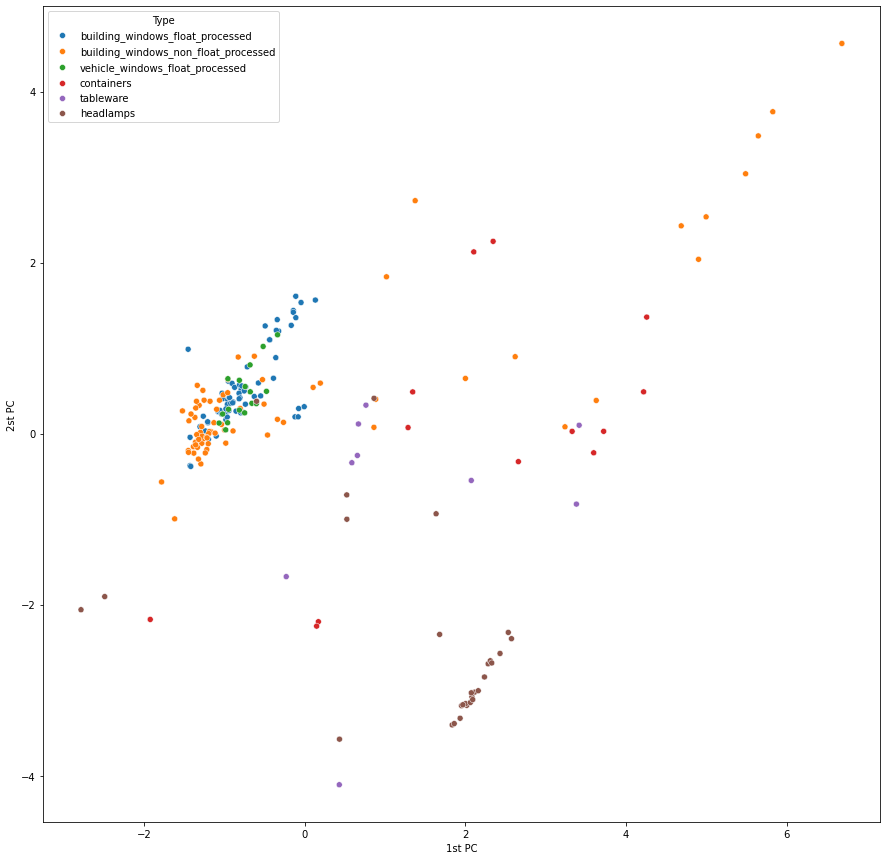

In [80]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=PC_data, x='pca0', y='pca1', hue='Type')
plt.xlabel('1st PC')
plt.ylabel('2st PC')
plt.show()